## Mudeli ehitamine

Nüüd alustame word2vec mudeli loomist. käivitame word2phrase, et grupeeriks sarnased sõnad (nt Loas Angeles oleks Los_Angeles).

In [2]:
import word2vec
word2vec.word2phrase('riigiteenused_mudelisse.txt', 'mudel/riigiteenused-phrases', verbose=True)   

b'Starting training using file riigiteenused_mudelisse.txt\r\n'b'\r\n'b'Vocab size (unigrams + bigrams): 7154\r\n'b'Words in train file: 12394\r\n'

Eelmise sammu võib ka vahele jättan ing otse toorteksti mudelisse sööta. Treenime mudeli.

In [3]:
word2vec.word2vec('mudel/riigiteenused-phrases', 'mudel/riigiteenused.bin', size=100, verbose=True)

b'Starting training using file mudel/riigiteenused-phrases\r\n'b'Vocab size: 570\r\n'b'Words in train file: 7654\r\n'

See genereeris "riigiteenused.bin" faili, mis sisaldab sõnavectoreid binaarformaadis. Nüüd teeme vektorite klastedamise treenitud mudeli põhjal.

In [4]:
word2vec.word2clusters('riigiteenused_mudelisse.txt', 'mudel/riigiteenused-clusters.txt', 100, verbose=True)

b'Starting training using file riigiteenused_mudelisse.txt\r\n'b'Vocab size: 574\r\n'b'Words in train file: 7902\r\n'

See lõi faili "riigiteenused-clusters.txt", mis iga klastreid iga sõna jaoks. Laeme mudeli üles ning hakkame sellega töötama.

In [5]:
model = word2vec.load('mudel/riigiteenused.bin')

Nüüd saame näiteks iga sõna koosinuse sarnasuse leida.

In [7]:
indexes, metrics = model.cosine('teenus')
model.generate_response(indexes, metrics).tolist()

[('teatamine', 0.29009538275919894),
 ('too', 0.2679329467989475),
 ('juriidiline_tagajärg', 0.2503037665336207),
 ('maa', 0.24770183542698532),
 ('ela', 0.2407197861337981),
 ('laev', 0.23539827072734315),
 ('päring', 0.23401616628885044),
 ('osutaja', 0.22805068479603405),
 ('saamine', 0.22012625895113597),
 ('laps', 0.21712019300066707)]

## Analoogiad

Nüüd läheb põnevamaks. Saame teha lihtsat aritmeetikat sõnadega. Mis jääb sõnast "teenus" alles kui sellest maha lahutada "esitama" ning liita sõna "päring".

In [15]:
indexes, metrics = model.analogy(pos=['luba', 'litsents'], neg=['esitamine'], n=10)
indexes, metrics
model.generate_response(indexes, metrics).tolist()

[('avalda', 0.18797967300023669),
 ('vastavus', 0.17150743262537507),
 ('avalikustamine', 0.16127968373872267),
 ('vastuta', 0.16107394398104938),
 ('väljaanne', 0.15996179825140733),
 ('maakataster', 0.1594734900967568),
 ('ühe', 0.15869540315057978),
 ('jagamine', 0.15500996061503447),
 ('lahendamine', 0.15490117643048185),
 ('süsteem', 0.1495121387624915)]

Klasterdamine

In [17]:
clusters = word2vec.load_clusters('mudel/riigiteenused-clusters.txt')
clusters[b'teenus']
clusters.get_words_on_cluster(90).shape
clusters.get_words_on_cluster(90)[:10]

array([b'alaealine', b'h\xc3\xbcpoteekga', b'm\xc3\xbc\xc3\xbck', b'aeg',
       b'lahendamine'], dtype=object)

## Visualiseerimine 

Visualiseerimine sõande sarnasusi ja erisusi. Selleks loome enne funktsiooni.

In [18]:
from matplotlib import pylab
from sklearn.decomposition import PCA

def plot(words):
    %matplotlib inline
    embeddings = [model[w] for w in words]
    
    pca = PCA(n_components=2) 
    two_d_embeddings = pca.fit_transform(embeddings)
    
    pylab.figure(figsize=(5,5))  # in inches
    for i, label in enumerate(words):
        x, y = two_d_embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
        pylab.xlabel("principal component 1")
        pylab.ylabel("principal component 2")
    pylab.show()

Visualiseerime need sõnad

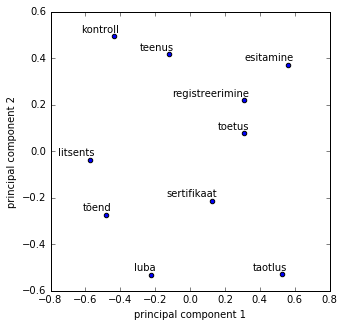

In [24]:
plot("teenus taotlus luba registreerimine esitamine sertifikaat tõend litsents kontroll toetus".split())

Siit on näha, et tõendid ja load klassifitseerib ühte grupp (y-telje alumine osa). Eraldi klasterdab tegusõnad ja mõsite "teenus". Tundub et teenus on lähemal tegevusele, kui otsesele paberile.